In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns",None)
df=pd.read_csv("/content/drive/MyDrive/internship/train.csv")
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [ ]:
df["Date of Joining"]=pd.to_datetime(df["Date of Joining"])

In [ ]:
df.shape

(22750, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i,col in enumerate(df.columns):
  print(f"\n\n{df[col].unique()}")
  print(f"\n\{df[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

\fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008

In [ ]:
#drop irrevelant columns
df=df.drop(["Employee ID"],axis=1)

In [ ]:
#check the skewness of the attributes
intfloatdf=df.select_dtypes([np.int,np.float])
for i,col in enumerate(intfloatdf.columns):
  if(intfloatdf[col].skew() >=0.1):
    print("\n",col,"Feature is positively skewed and value is :",intfloatdf[col].skew())
  elif(intfloatdf[col].skew() <= -0.1):
    print("\n",col,"Feature is Negatively skewed and value is :",intfloatdf[col].skew())
  else:
    print("\n",col,"Feature is Normally skewed and value is :",intfloatdf[col].skew())



 Designation Feature is Normally skewed and value is : 0.09242138478903683

 Resource Allocation Feature is positively skewed and value is : 0.20457273454318103

 Mental Fatigue Score Feature is Negatively skewed and value is : -0.4308950578815428

 Burn Rate Feature is Normally skewed and value is : 0.045737370909640515


In [ ]:
#replace the null vvalues with mean
df["Resource Allocation"].fillna(df["Resource Allocation"].mean(),inplace=True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(),inplace=True)
df["Burn Rate"].fillna(df["Burn Rate"].mean(),inplace=True)

In [ ]:
#check for null values
df.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
#show the correlation
df.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [ ]:
#plotting heat map to check correlation
corr=df.corr()
sns.set(rc={"figure.figsize":(14,12)})
fig=px.imshow(corr,text_auto=True,aspect="auto")
fig.show()

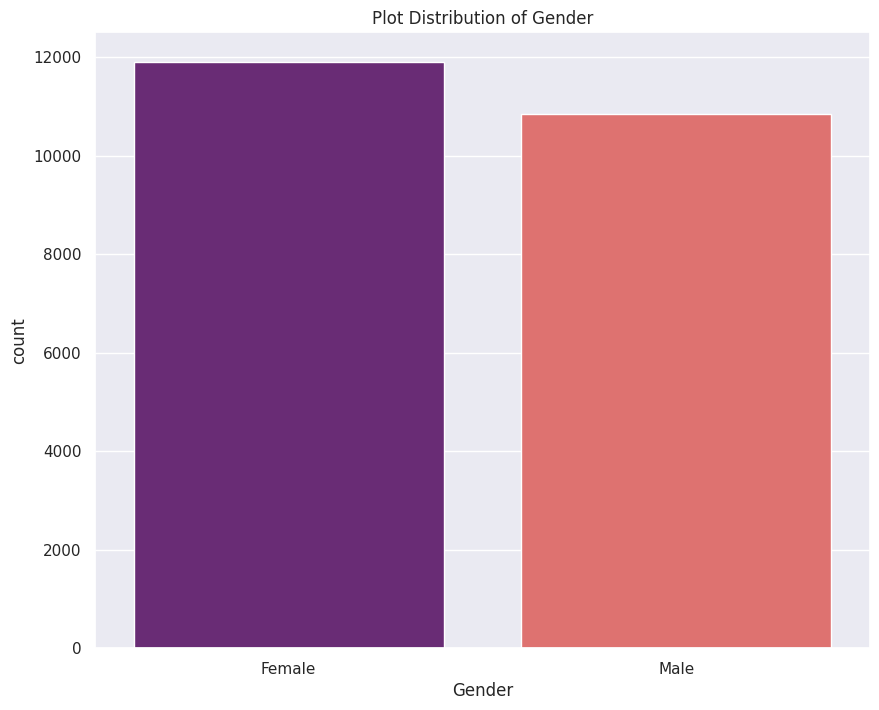

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=df,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

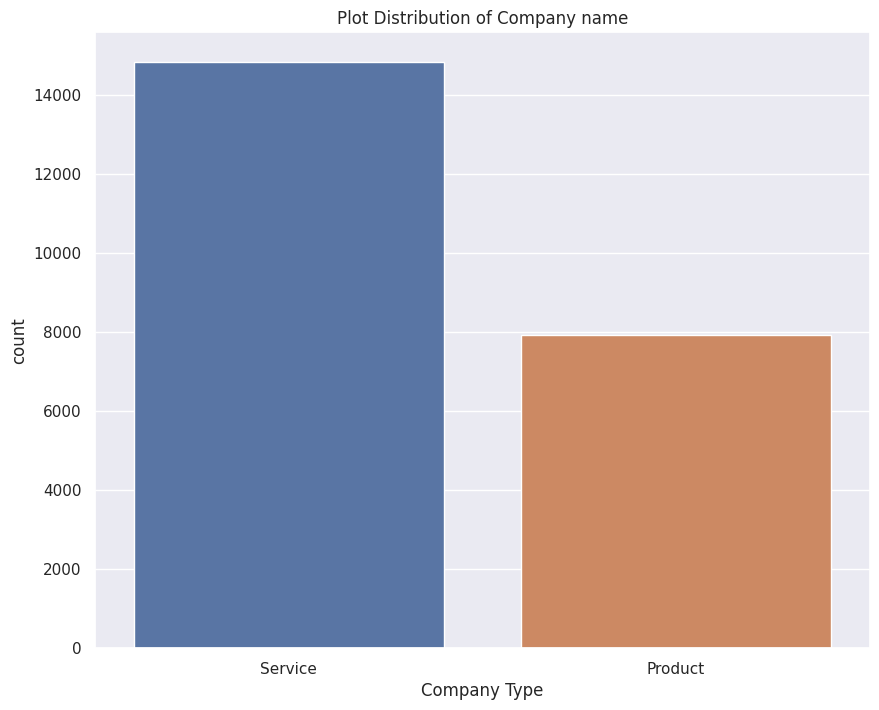

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=df)
plt.title("Plot Distribution of Company name")
plt.show()

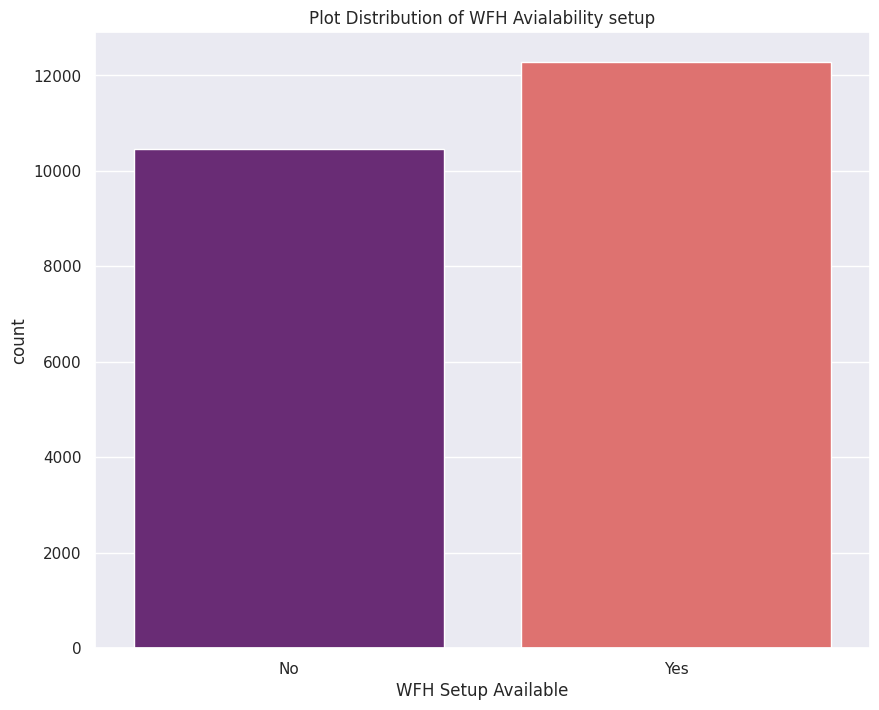

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=df,palette="magma")
plt.title("Plot Distribution of WFH Avialability setup")
plt.show()

In [ ]:
#count plot distribution of attributes with the help of histogram
burn_st=df.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st, x=col, title="plot distribution of"+col,color_discrete_sequence=["indianred"])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
#plot distribution of burnrate on the basis of designation
fig=px.line(df,y="Burn Rate",color="Designation",title="Burn Rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
#plot distribution of mental fatigue on the basis of designation
fig=px.line(df,y="Mental Fatigue Score",color="Designation",title="Burn Rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

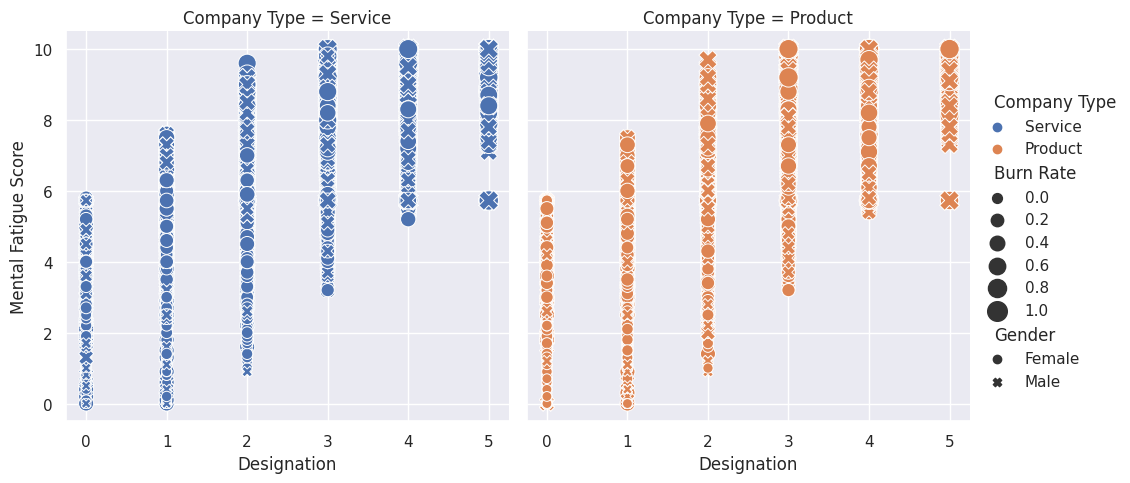

In [ ]:
 #plot distribution of Designation VS mental fatigue as per Company Type,Burn Rate and Gender
 sns.relplot(
    data=df,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",
    sizes=(50,200)
 )

In [ ]:
#LABEL ENCODING

In [ ]:
#label encoding and assign in new varaible
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

In [ ]:
#assign in new varaible
df["GenderLabel"]=label_encode.fit_transform(df["Gender"].values)
df["Company_TypeLabel"]=label_encode.fit_transform(df["Company Type"].values)
df["WFH_Setup_AvailableLabel"]=label_encode.fit_transform(df["WFH Setup Available"].values)

In [ ]:
#Checkassigned values
gn=df.groupby("Gender")
gn=gn["GenderLabel"]
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
#Checkassigned values
ct=df.groupby("Company Type")
ct=ct["Company_TypeLabel"]
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
#Checkassigned values
wsa=df.groupby("WFH Setup Available")
wsa=wsa["WFH_Setup_AvailableLabel"]
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
df.tail()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22745,2008-12-30,Female,Service,No,1.0,3.0,5.728188,0.41,0,1,0
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.700000,0.59,0,0,1
22747,2008-11-05,Male,Service,Yes,3.0,7.0,5.728188,0.72,1,1,1
22748,2008-01-10,Female,Service,No,2.0,5.0,5.900000,0.52,0,1,0
22749,2008-01-06,Male,Product,No,3.0,6.0,7.800000,0.61,1,0,0


In [ ]:
#FEATURE SELECTION

In [ ]:
#feature selection
columns=["Designation","Resource Allocation","Mental Fatigue Score",
         "GenderLabel","Company_TypeLabel","WFH_Setup_AvailableLabel"]
X=df[columns]
y=df["Burn Rate"]

In [ ]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0              2.0             3.000000              3.800000            0   
1              1.0             2.000000              5.000000            1   
2              2.0             4.481398              5.800000            0   
3              1.0             1.000000              2.600000            1   
4              3.0             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745          1.0             3.000000              5.728188            0   
22746          3.0             6.000000              6.700000            0   
22747          3.0             7.000000              5.728188            1   
22748          2.0             5.000000              5.900000            0   
22749          3.0             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [ ]:
#IMPLEMENTING PCA

In [ ]:
#principle component analysis
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)

print("PCA shape of x is",X_pca.shape,"and original shape is",X.shape)
print("% of importance of selected features is:",pca.explained_variance_ratio_)
print("The number of feature selected through PCA is",pca.n_components_)

PCA shape of x is (22750, 4) and original shape is (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of feature selected through PCA is 4


In [ ]:
#DATA SPLITTING

In [ ]:
#Data splitting in train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test=train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [ ]:
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


In [ ]:
#MODEL IMPLEMENTATION
#random forst regressor

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#random forst regressor
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train_pca,Y_train)


train_pred_rf=rf_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_pred_rf)
test_pred_rf=rf_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_rf)
#Accuracy score
print("Accuracy score of train data:"+str(round(100*train_r2,4))+" %")
print("Accuracy score of test data:"+str(round(100*test_r2,4))+" %")

Accuracy score of train data:91.1951 %
Accuracy score of test data:83.9755 %


In [ ]:
#AdaBoost regressor
#from sklearn.ensemble import AdaBoostRegressor
#abr_model=AdaBoostRegressor()
#abr_model.fit(X_train_pca,Y_train)


#train_pred_adaboost=abr_model.predict(X_train_pca)
#train_r2=r2_score(Y_train,train_pred_adaboost)
#test_pred_adaboost=abr_model.predict(X_test)
#test_r2=r2_score(Y_test,test_pred_adaboost)
#Accuracy score
#print("Accuracy score of train data:"+str(round(100*train_r2,4))+" %")
#print("Accuracy score of test data:"+str(round(100*test_r2,4))+" %")

Accuracy score of train data:76.4253 %
Accuracy score of test data:76.0122 %


In [ ]:
#Linearregression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_pca, Y_train)

y_pred = model.predict(X_test)

# Avaliando o modelo
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R2:', metrics.r2_score(Y_test, y_pred))

MAE: 0.057684678868872956
RMSE: 0.006292451400353914
R2: 0.8293668111291459


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.model_selection import GroupKFold, RepeatedKFold
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
errcb=[]
y_pred_totcb=[]
fold= KFold(n_splits=10, shuffle=True, random_state=1)#0#1
i=1
for train_index, test_index in fold.split(X):
    X_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m = CatBoostRegressor(eval_metric='R2',subsample=0.7,bagging_temperature=0.9, l2_leaf_reg=2, n_estimators=1500, learning_rate=0.025)
    #CatBoostRegressor(eval_metric='R2',subsample=0.7, l2_leaf_reg=2)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(x_test, y_test)],verbose=100, early_stopping_rounds=100)#,verbose=100)
    preds=m.predict(x_test)
    print("err: ",r2_score(y_test,preds))
    errcb.append(r2_score(y_test,preds))
    p = m.predict(x_test)
    y_pred_totcb.append(p)

0:	learn: 0.0379111	test: 0.0379111	test1: 0.0374972	best: 0.0374972 (0)	total: 21.1ms	remaining: 31.6s
100:	learn: 0.8434326	test: 0.8434326	test1: 0.8345010	best: 0.8345010 (100)	total: 1.04s	remaining: 14.4s
200:	learn: 0.8624718	test: 0.8624718	test1: 0.8490168	best: 0.8490168 (200)	total: 1.54s	remaining: 9.97s
300:	learn: 0.8670627	test: 0.8670627	test1: 0.8517538	best: 0.8517542 (293)	total: 2.06s	remaining: 8.2s
400:	learn: 0.8697339	test: 0.8697339	test1: 0.8526394	best: 0.8527180 (391)	total: 2.6s	remaining: 7.11s
500:	learn: 0.8714983	test: 0.8714983	test1: 0.8526338	best: 0.8527860 (429)	total: 2.97s	remaining: 5.92s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8527859798
bestIteration = 429

Shrink model to first 430 iterations.
err:  0.852785981143316
0:	learn: 0.0380360	test: 0.0380360	test1: 0.0383643	best: 0.0383643 (0)	total: 10.7ms	remaining: 16.1s
100:	learn: 0.8427607	test: 0.8427607	test1: 0.8397041	best: 0.8397041 (100)	total: 662ms	remain

In [ ]:
np.mean(errcb)

0.8656380048700848

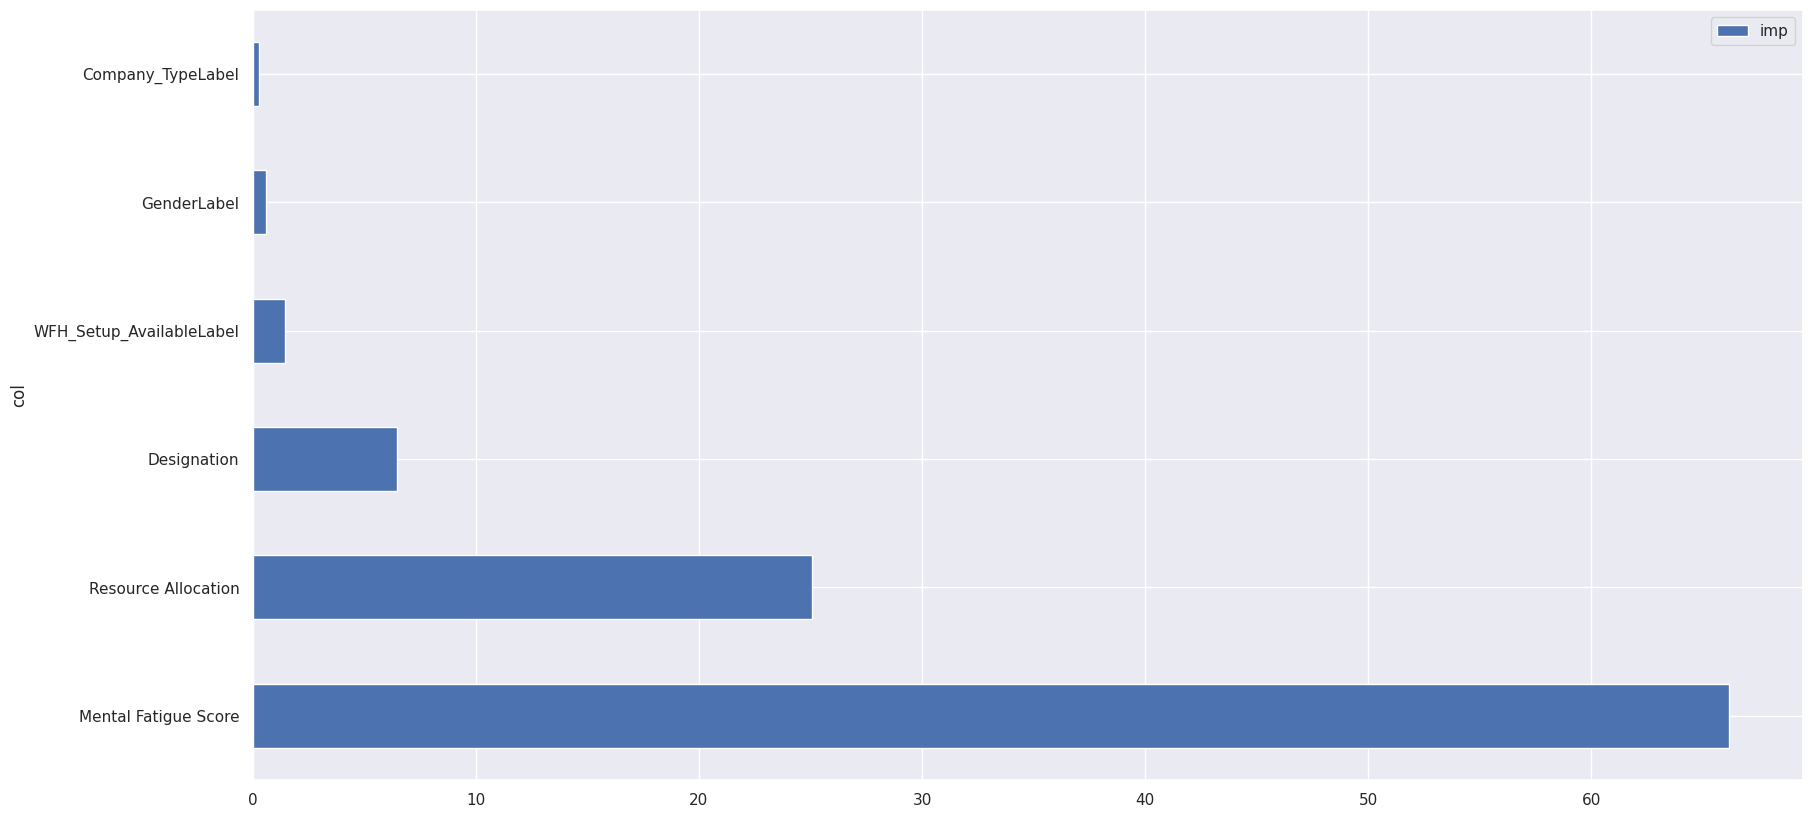

In [ ]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=False).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.model_selection import GroupKFold, RepeatedKFold
errcb=[]
y_pred_totcb=[]
fold= KFold(n_splits=10, shuffle=True, random_state=10)#25
i=1
for train_index, test_index in fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m =XGBRegressor(learning_rate=0.1, n_estimator=1500)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=100, early_stopping_rounds=100)#,verbose=100)
    preds=m.predict(X_test)
    print("err: ",r2_score(y_test,preds))
    errcb.append(r2_score(y_test,preds))
    p = m.predict(X_test)
    y_pred_totcb.append(p)

[08:22:19] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.18273	validation_1-rmse:0.17756
[99]	validation_0-rmse:0.06743	validation_1-rmse:0.06949
err:  0.8631715815066635
[08:22:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.18216	validation_1-rmse:0.18280
[99]	validation_0-rmse:0.06700	validation_1-rmse:0.07381
err:  0.8573198286803924
[08:22:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.18203	validation_1-rmse:0.18471
[99]	validation_0-rmse:0.06789	validation_1-rmse:0.06647
err:  0.884996517215234
[08:22:21] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:0.18187	validation_1-rmse:0.18577
[99]	validation_0-rmse:0.06731	validation_1-rmse:0.07013
err:  0.8752596909647214
[08:22:22] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	

In [ ]:
np.mean(errcb)

0.8652065006468457

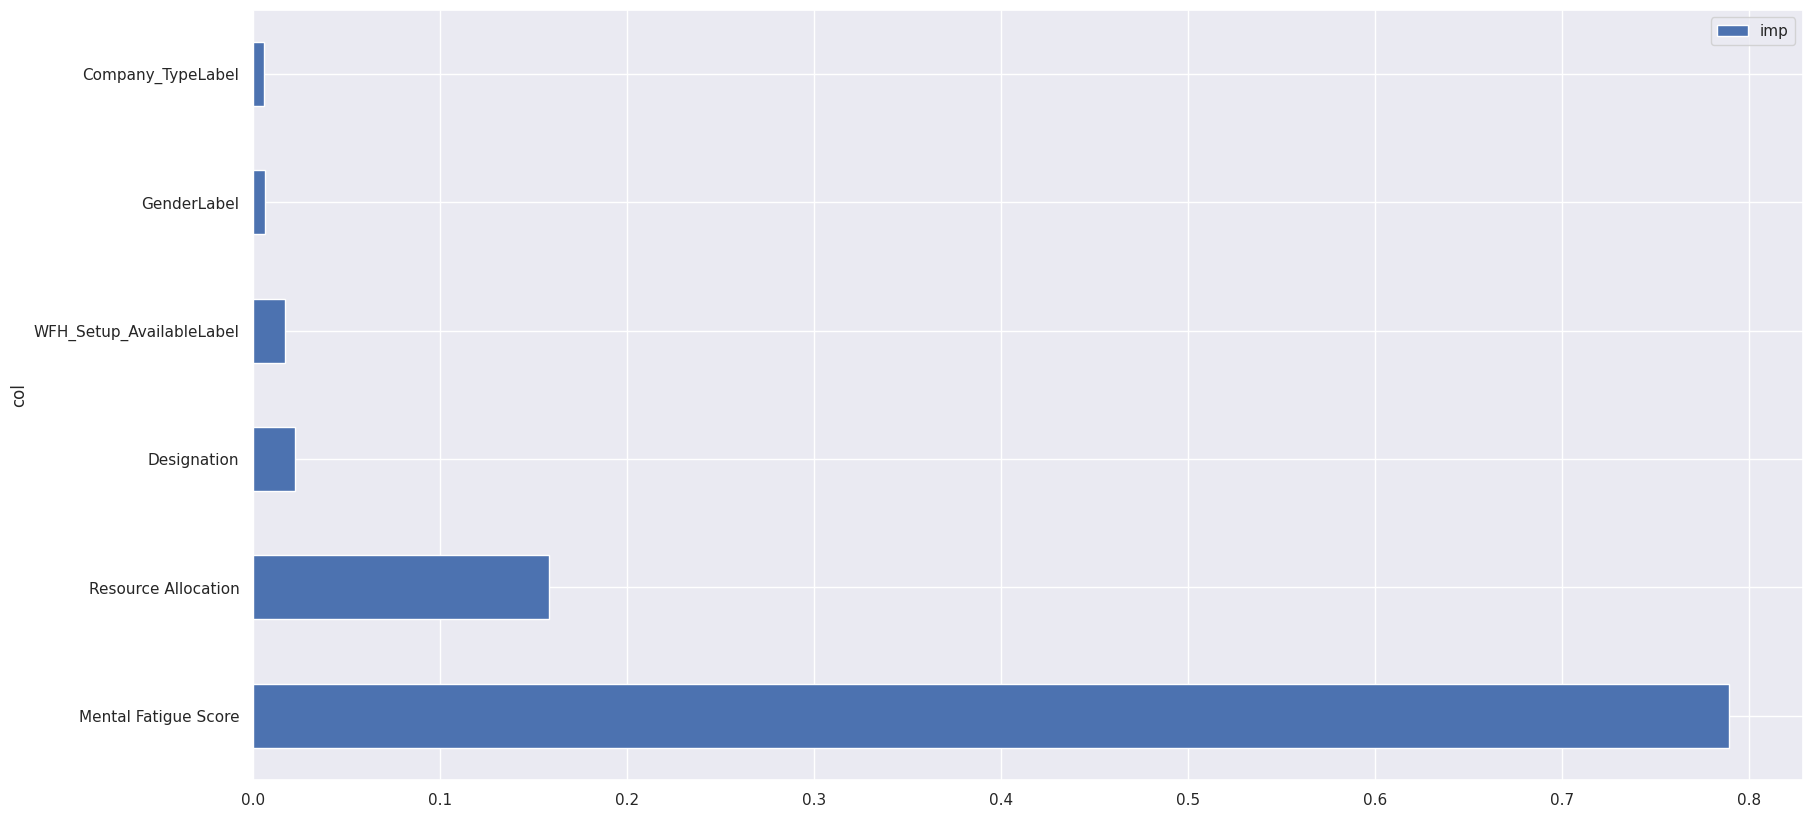

In [ ]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=False).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')